# Challenge Exercise: Radar Gun 

With an ultrasonic sensor and some clever math, it is possible to build a "radar gun" that tracks the max speed of a moving object. Before getting into the code, it is important to first understand the math that allows this radar gun idea to work.

Think back to the distance sensing exploration. In that exercise we plotted the distance recorded by the sensor vs the time at which it took that reading. When things were moving fast, the curve was steeper, as the distance changed quicker *with respect to* time. It turns out that to measure the speed at which an object is moving, all you need to do is figure out how steep the distance vs time curve is; that is to say, you need to calculate its *slope*.

Knowing this, think about how you could write a function to return the slope between the last two points of a data set. Then, have the function loop while the ultrasonic sensor takes data and puts it into an array. The function should continually return the slope between the last two readings of the sensor. Print this reading at a readable interval so that you can see the "speed" at which the object is moving. Here's a template to get you started:

In [ ]:
#Radar Gun Template
# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3
#import other stuff:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import time
from EDL_Jupyter_resources import HiddenPrints
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

#define our ultrasonic sensor object as plugged into AD1
US_sensor = easyGPG.init_ultrasonic_sensor("AD1")

###Functions###

def take_slope(data):  
    '''
    Gets a data set (y values) and calculates the slope
    between the last two points
    '''
    if len(data)==1: #if data has len 1 it has no slope
        return 0
    
    '''Fill in the blanks below to finish the function'''
    
    y2=
    y1=
    dx=1 #dx is the length of sample
    dy=y2-y1 #dy is the change in data

    return(dy/dx)

###Variable Initialization###

#these arrays will store data about the pos and speed
reading_data=np.array([]) #init reading data
slope_data=np.array([]) #init slope data
times=np.array([]) #for plotting data

###Parameters###

#how long and how fast to sample
sample_rate=4 #rate at which to run loop in Hz
length=10 #length of sample

###Loop###

print("Starting")
start=time.time()
while time.time()-start<length: 
    with hiddenprints:
        reading=US_sensor.read() #get sensor reading
        
    reading_data=np.append(reading_data,reading) #add it to dataset
     
    slope= #get slope of data
    slope_data=np.append(slope_data,slope)
    
    '''
    Here you should report the live speed (slope)
    
    For a challenge, only report the speed as fast as you can
    read it, and report both average and max speeds over that 
    interval
    '''
    
    time.sleep(1.0/sample_rate) #sleep

print('Done')

###Plotting Data###

plt.figure(0)
plt.plot(times,reading_data)
plt.figure(1)
plt.plot(times,slope_data)
plt.show()

For a greater challenge, increase the sample rate (rate at which your loop runs) and have the console print at a different rate that is still readable to the user. Make it print the average speed during that interval as well as the maximum speed. Now you can see the max speed your sensor recorded and catch speeders in your house!

Avg speed is 1.511494
Max speed is 2.166667
Done


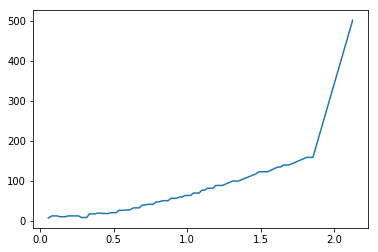

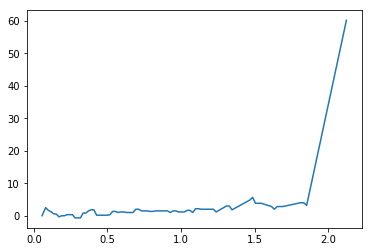

In [23]:
#radar gun
# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3
#import other stuff:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import time
from EDL_Jupyter_resources import HiddenPrints
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

#define our ultrasonic sensor object as plugged into AD1
US_sensor = easyGPG.init_ultrasonic_sensor("AD1")

def take_slope(data,band): 
    '''
    Gets a data set and a range on which to calculate slope
    Returns that slope as dy/dx
    '''
    if len(data)==1: #if data has len 1 it has no slope
        return 0
    if band>len(data): #if input band is larger than possible, set band as large as possible
        band=len(data)
    f=data[len(data)-1] #final value
    i=data[len(data)-band] #start value (of band)
    dx=band #dx is the length of sample (band)
    dy=f-i  #dy is the change in data
    
    return(dy/dx)

reading_data=np.array([]) #init reading data
slope_data=np.array([]) #init slope data
recent_slopes=np.array([]) #for live speed visualization
times=np.array([]) #for plotting data

print('Starting') 
freq=2 # number of times per second to report speed
avg_speed=0 #init avg speed variable
max_speed=0 #init max speed variable
counter=0 #init loop counter variable
sample_rate=60 #rate at which to run loop in Hz
length=2 #length of sample
start=time.time()
while time.time()-start<length: 
    with hiddenprints:
        reading=US_sensor.read() #get sensor reading
        
    reading_data=np.append(reading_data,reading) #add it to dataset
     
    slope=take_slope(reading_data,int(sample_rate/10)) #get slope of data
    slope_data=np.append(slope_data,slope) #add slope to dataset
    
    current_time=time.time()-start #get current loop time
    times=np.append(times,current_time) #add time to dataset
    
    if counter%(sample_rate/freq)==0: #if it is time to report speed
        if len(reading_data)>1: #if it isn't the first iteration of the loop
            #recent slopes is the last bit of data we want to average
            recent_slopes=slope_data[len(slope_data)-int(sample_rate/freq):len(slope_data)-1]
            avg_speed=np.mean(recent_slopes) #avg speed is the mean of this recent slope
            if avg_speed>0:
                max_speed=np.max(recent_slopes) #max speed
            else: #if speed is negative, max is actually min
                max_speed=np.min(recent_slopes) #max speed
        else:
            avg_speed=slope #otherwise its just the first slope
            max_speed=slope
        clear_output()
        print('Avg speed is %f'%avg_speed) #report speeds
        print('Max speed is %f'%max_speed)

        
    counter=counter+1 #add to the counter
    time.sleep(1.0/sample_rate) #sleep

print('Done')
    
plt.figure(0)
plt.plot(times,reading_data)
plt.figure(1)
plt.plot(times,slope_data)
plt.show()